In [1]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sample_data import sample_data
from fscoreai import linear

# Import Data For Classification

In [2]:
iris = sample_data.iris_data()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris['species'] = iris['species'].astype('category')
iris['target'] = pd.Categorical(iris['species'])
iris['target'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

Text(0.5, 1.0, 'Scatter Plot')

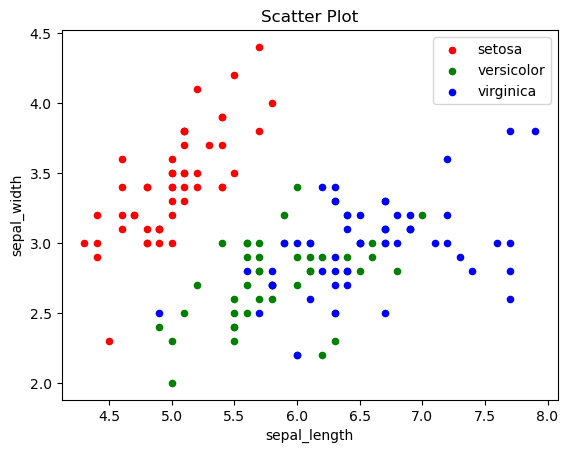

In [4]:
ax = iris[iris.species=="Iris-setosa"].plot.scatter(x='sepal_length', y='sepal_width', color='red', label='setosa')
iris[iris.species=="Iris-versicolor"].plot.scatter(x='sepal_length', y='sepal_width', color='green', label='versicolor', ax=ax)
iris[iris.species=="Iris-virginica"].plot.scatter(x='sepal_length', y='sepal_width', color='blue', label='virginica', ax=ax)
ax.set_title("Scatter Plot")

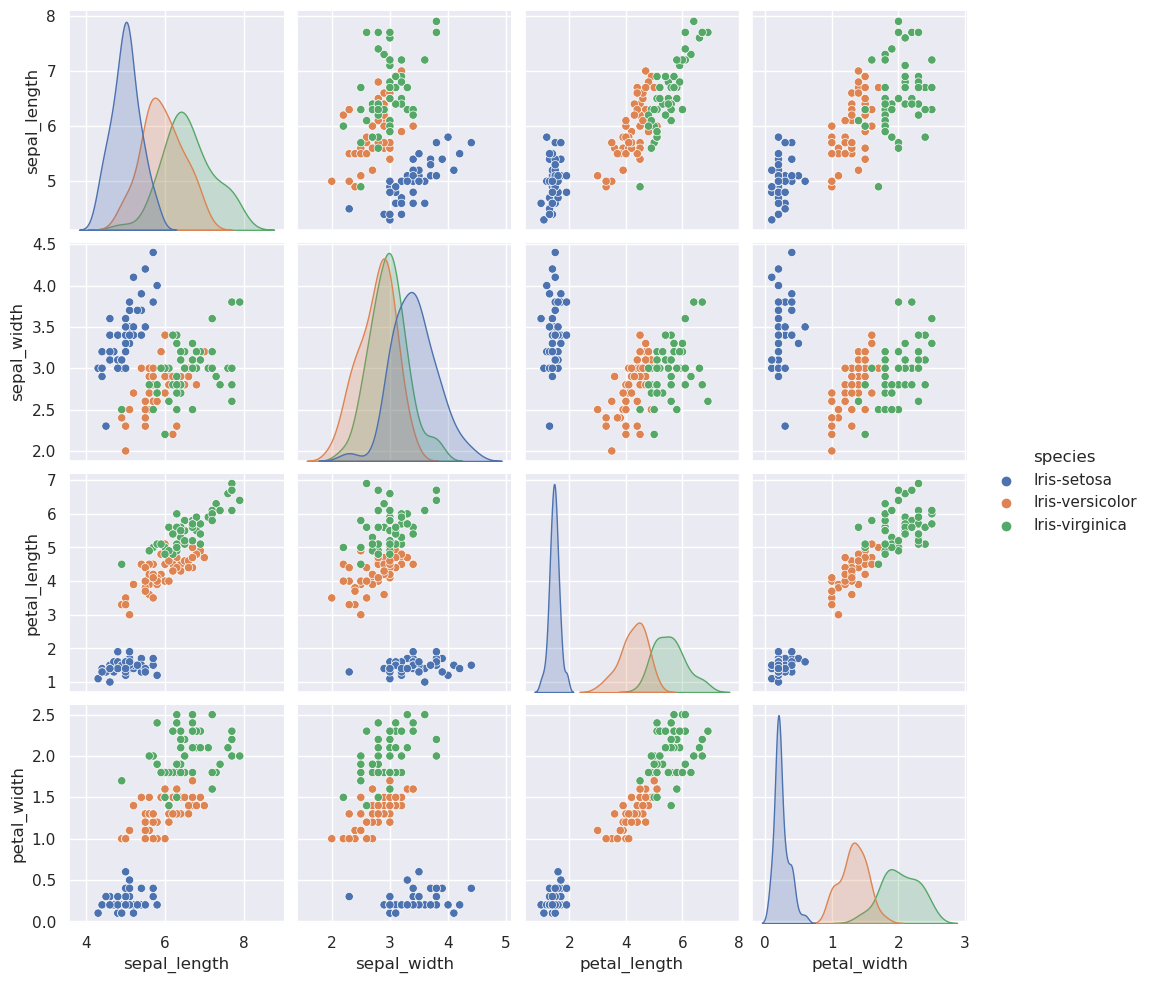

In [5]:
sns.set()
sns.pairplot(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], hue="species", diag_kind='kde')

Text(3.8, 4.5, 'setosa')

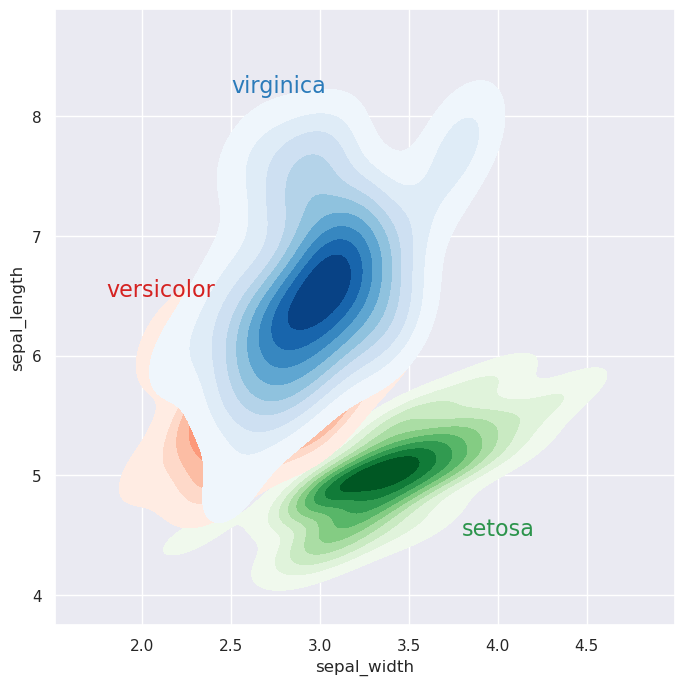

In [6]:
# kdeplot using seaborn
sns.set(style='darkgrid')
setosa = iris.query("species=='Iris-setosa'")
versicolor = iris.query("species=='Iris-versicolor'")
virginica = iris.query("species=='Iris-virginica'")
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(x=setosa.sepal_width, y=setosa.sepal_length, cmap="Greens",
          fill=True, thresh=0.05)
ax = sns.kdeplot(x=versicolor.sepal_width, y=versicolor.sepal_length, cmap="Reds",
          fill=True, thresh=0.05)
ax = sns.kdeplot(x=virginica.sepal_width, y=virginica.sepal_length, cmap="Blues",
          fill=True, thresh=0.05)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(1.8, 6.5, "versicolor", size=16, color=red)
ax.text(3.8, 4.5, "setosa", size=16, color=green)

In [7]:
iris = iris[iris['species'] != 'Iris-virginica']

In [8]:
X = iris.drop(columns=['species', 'target']).to_numpy()
y = iris['target'].to_numpy()
y = np.unique(y, return_inverse=True)[1]

## SkLearn Model

In [9]:
clf = LogisticRegression()
clf.fit(X, y)
print(clf.intercept_, clf.coef_)
clf.score(X, y)

[-6.64224829] [[ 0.44061796 -0.90161617  2.31048433  0.9677031 ]]


1.0

## Custom Model

In [22]:
def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [29]:
clf = linear.LogisticRegression()
clf.fit(X, y, lr=1e-2, n_epochs=10000)
print(clf.intercept_, clf.coef_)
y_pred = clf.predict(X).reshape(-1, )
accuracy_score(y, y_pred)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 46265.84it/s]

[-0.67817907] [[-0.30287002]
 [-2.19357785]
 [ 2.8833904 ]
 [ 1.44882728]]


1.0